<h1 align="center">Changes in PINCER indicators throughout the COVID-19 pandemic</h1>

Pharmacist-led information technology intervention (PINCER) is an effective way to reduce errors in prescription and medication monitoring which are responsible for a large proportion of adverse drug events. This is achieved through the monitoring of 14 PINCER indicators.

The purpose of this notebook is to describe practice level changes in adherence to each of the PINCER indicators  throughout the COVID-19 pandemic. For each indicator, the number of unique patients experiencing hazardous prescribing described by a given indicator at any point during the study period is provided. The total number of hazardous prescribing events for each indicator is also shown.  Practice level monthly rates of hazardous prescribing are calculated, ranked and used to calculate deciles of activity for each indicator, which are represented as decile charts.

The 14 PINCER measures include:
* [Gastrointestinal (GI) Bleed Indicators](#gi_bleed)
    * [Age 65+, on oral NSAID without gastroprotection (GI_P3A)](#a)
    * [H/O peptic ulcer, on oral NSAID without gastroprotection (GI_P3B)](#b)
    * [H/O peptic ulcer, on OAC without gastroprotection (GI_P3C)](#c)
    * [On OAC and oral NSAID (GI_P3D)](#d)
    * [On OAC and antiplatelet without gastroprotection (GI_P3E)](#e)
    * [On aspirin and antiplatelet without gastroprotection (GI_P3F)](#f)
* [Monitoring Indicators](#monitoring)
    * [Age 75+, on ACEI or loop, no renal function/electrolytes test (MO_P13)](#ac)
    * [Methotrexate audit (MO_P15)](#me)
        * [On methotrexate without recorded full blood count (FBC)](#me_no_fbc)
        * [On methotrexate without recorded liver functon test (LFT)](#me_no_lft)
    * [On lithium without recent lithium test (MO_P17)](#li)
    * [On amiodarone without recent thyroid function test (TFT) (MO_P18)](#am)
* [Other Indicators](#other)
    * [Asthma and non-selective BB (AS_P3G)](#g)
    * [Heart failure and oral NSAID (HF_P3I)](#i)
    
There are also a set of [composite indicators](#composites) which indicate the number of people with 1 or more of each of the broad measure categories:
* [GI Bleed Composite Indicator](#composite_gi_bleed)
* [Monitoring Composite Indicator](#composite_monitoring)
* [Other Composite Indicator](#composite_other)
* [Combined Composite Indicator](#composite_all)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpllimg
import matplotlib as mpl
import json
from IPython.display import HTML, display, Markdown, Image
import os
import numpy as np

backend =  os.getenv("OPENSAFELY_BACKEND", "expectations")
with open(f'../output/indicator_summary_statistics_{backend}.json') as f:
        summary = json.load(f)["summary"]

with open(f'../output/practice_count_{backend}.json') as f:
    practice_count_event = json.load(f)["num_practices_event"]

with open(f'../output/practice_count_{backend}.json') as f:
    practice_count = json.load(f)["num_practices"]

with open(f'../output/medians.json') as f:
    medians = json.load(f)["summary"]

num_gi_bleed_events = 0
num_monitoring_events = 0
num_other_events = 0


gi_bleed_indicators = ["a", "b", "c", "d", "e", "f"]
for i in gi_bleed_indicators:
    events = int(summary[i]['events'])
    num_gi_bleed_events += events

monitoring_indicators = ["ac", "me_no_fbc", "me_no_lft", "li", "am"]
for i in monitoring_indicators:
    events = int(summary[i]['events'])
    num_monitoring_events += events

other_prescribing_indicators = ["g", "i"]
for i in other_prescribing_indicators:
    events = int(summary[i]['events'])
    num_other_events += events


title_mapping = {
    "a": "Age >= 65 & NSAID",  # "NSAID without gastroprotection, age >=65",
    "b": "PU & NSAID",  # "NSAID without gastroprotection, H/O peptic ulcer",
    "c": "PU & antiplatelet",  # "Antiplatelet without gastroprotection, H/O peptic ulcer",
    "d": "Warfarin/DOAC & NSAID",  # "DOAC with warfarin",
    # "Anticoagulation and antiplatelet, no gastroprotection",
    "e": "Warfarin/DOAC & antiplatelet",
    # "Aspirin and antiplatelet, no gastroprotection",
    "f": "Aspirin & other antiplatelet",
    "g": "Asthma & beta-blocker",  # "Asthma and non-selective beta-blocker",
    "i": "HF & NSAID",  # "Heart failure and NSAID",
    "k": "CRF & NSAID",  # "Chronic renal impairment and NSAID",
    # "ACE inhibitor or loop diuretic without renal function/electrolyte test",
    "ac": "ACEI or loop diuretic, no blood tests",
    # "Methotrexate without full blood count",
    "me_no_fbc": "Methotrexate and no FBC",
    # "Methotrexate without liver function test",
    "me_no_lft": "Methotrexate and no LFT",
    # "Lithium without lithium concentration test",
    "li": "Lithium and no level recording",
    "am": "Amiodarone and no TFT",  # "Amiodarone without thyroid function test",
    ### Summary categories
    "gi_bleed": "Indicators associated with gastrointestinal bleeding",
    "monitoring": "Indicators associated blood test monitoring",
    "other": "Indicators associated with cautioned medication in other conditions (including heart failure, asthma and acute kidney injury)",
}

def show_summary(indicator):
    display(
    Markdown(f"Number of practices with at least one hazardous prescribing event throughout the study period: {summary[indicator]['num_practices']} ({summary[indicator]['percent_practice']}%)"),
    Markdown(f"Number of unique patients at risk of a hazardous prescribing event throughout the study period: {summary[indicator]['patients_denominator']:,}"),
    Markdown(f"Number of unique patients experiencing at least one hazardous prescribing event throughout the study period: {summary[indicator]['patients_numerator']:,}"),
    Markdown(f"Number of hazardous prescribing events throughout the study period: {int(summary[indicator]['events']):,}"),
    Markdown(f"Q1 2020 mean proportion: {round(medians[indicator]['pre'], 4)}"),
    Markdown(f"Q1 2021 mean proportion: {round(medians[indicator]['post'], 4)}")
       
       )
        
def show_image(path):

    img=Image(path)
    display(img)

In [2]:
indicator_order = ['gi_bleed','a','b','c','d','e','f', 'monitoring','ac','me_no_fbc','me_no_lft','li','am','other','g','i'] #,'k']
column_names = {"pre": "Q1 mean proportion 2020",
                "post": "Q1 mean proportion 2021",
                "patients_numerator": "Numerator",
                "patients_denominator": "Denominator",
                "ratio": "%",
                "events": "Number of hazardous prescribing events",
                "events_per_patient": "Ratio of events to patients",
                "num_practices": "Number of practices with at least one hazardous prescribing event",
                "percent_practice": "% of total number of practices",
                "practice_string": "Number of practices with at least one hazardous prescribing event (% of total number of practices)"
                }

def generate_summary_table():

    summary_table = pd.DataFrame.from_dict(summary).T.reindex(indicator_order)
    medians_table = pd.DataFrame.from_dict(medians).T.reindex(indicator_order).round(2)

    summary_table_out = (summary_table
                         .assign(patients_numerator=pd.to_numeric(summary_table.patients_numerator, downcast="integer"))
                         .assign(patients_denominator=pd.to_numeric(summary_table.patients_denominator, downcast="integer"))
                         .assign(num_practices=pd.to_numeric(summary_table.num_practices, downcast="integer"))
                         )

    ### Missing values mean that we can't use the above method to convert the event count to integers
    summary_table_out['events'] = summary_table_out['events'].astype('Int64')
    summary_table_out['ratio'] = round(
        100*(summary_table_out['patients_numerator']/summary_table_out['patients_denominator']), 2)
    summary_table_out['events_per_patient'] = round((summary_table_out['events']/summary_table_out['patients_numerator']), 2)

    practice_string = summary_table_out.num_practices.map(
        str) + " (" + summary_table_out.percent_practice.map(str) + "%)"
    practice_string[np.isnan(summary_table_out.percent_practice)] = "-"
    summary_table_out['practice_string'] = practice_string

    final_table = summary_table_out.join(medians_table)[column_names.keys()]
    final_table_display = final_table.rename(columns=column_names, index=title_mapping)

    display(final_table_display)

## Summary

In [3]:
display(
    Markdown(f"Total number of hazardous prescribing events throughout the study period: {int(summary['total_events'])}"),
    Markdown(f"Number of unique patients at risk of a hazardous prescribing event throughout the study period: {summary['total_patients_denominator']}"),
    Markdown(f"Number of unique patients experiencing a hazardous prescribing event throughout the study period: {summary['total_patients']}"),
    Markdown(f"Number of practices with at least one hazardous prescribing event throughout the study period: {practice_count_event} ({round((practice_count_event/practice_count), 2) * 100}%)"),
       )

Total number of hazardous prescribing events throughout the study period: 245253

Number of unique patients at risk of a hazardous prescribing event throughout the study period: 29095

Number of unique patients experiencing a hazardous prescribing event throughout the study period: 29092

Number of practices with at least one hazardous prescribing event throughout the study period: 43 (100.0%)

Relevant information for each indicator is summarised in the table below.

In [4]:
generate_summary_table()

,Q1 mean proportion 2020,Q1 mean proportion 2021,Numerator,Denominator,%,Number of hazardous prescribing events,Ratio of events to patients,Number of practices with at least one hazardous prescribing event,% of total number of practices,Number of practices with at least one hazardous prescribing event (% of total number of practices)
Indicators associated with gastrointestinal bleeding,NaN,NaN,28157,28803,97.76,<NA>,<NA>,43,NaN,-
Age >= 65 & NSAID,111.94,105.17,17525,17484,100.23,21468,122.5,38,88.37,38 (88.37%)
PU & NSAID,101.70,104.49,17411,17546,99.23,21204,121.79,39,90.70,39 (90.7%)
PU & antiplatelet,92.46,100.34,17528,17474,100.31,21414,122.17,41,95.35,41 (95.35%)
Warfarin/DOAC & NSAID,115.13,107.98,17562,17533,100.17,21425,122.0,40,93.02,40 (93.02%)
Warfarin/DOAC & antiplatelet,21.87,23.31,4715,17513,26.92,4938,104.73,34,79.07,34 (79.07%)
Aspirin & other antiplatelet,22.74,27.29,4886,17628,27.72,5113,104.65,35,81.40,35 (81.4%)
Indicators associated blood test monitoring,NaN,NaN,28515,27867,102.33,<NA>,<NA>,43,NaN,-
"ACEI or loop diuretic, no blood tests",105.40,102.29,17594,17508,100.49,21371,121.47,40,93.02,40 (93.02%)
Methotrexate and no FBC,105.97,97.73,17457,17493,99.79,21290,121.96,39,90.70,39 (90.7%)


<a id="gi_bleed"></a>
## Gastrointestinal (GI) Bleed Indicators


In [5]:
display(
    Markdown(f"Number of practices with at least one hazardous prescribing event throughout the study period: {summary['gi_bleed']['num_practices']}"),
    Markdown(f"Number of unique patients at risk of a hazardous prescribing event throughout the study period: {summary['gi_bleed']['patients_denominator']:,}"),
    Markdown(f"Number of unique patients experiencing at least one hazardous prescribing event throughout the study period: {summary['gi_bleed']['patients_numerator']:,}"),
    Markdown(f"Number of hazardous prescribing events throughout the study period: {num_gi_bleed_events:,}")
       )

Number of practices with at least one hazardous prescribing event throughout the study period: 43

Number of unique patients at risk of a hazardous prescribing event throughout the study period: 28,803

Number of unique patients experiencing at least one hazardous prescribing event throughout the study period: 28,157

Number of hazardous prescribing events throughout the study period: 95,562

<a id="a"></a>
### Age 65+, on oral NSAID without gastroprotection (GI_P3A)

Prescription of an oral NSAID in the previous 3 months to patients aged 65 or above who have been co-prescribed an ulcer healing drug in the previous 3 months.  

In [6]:
show_summary('a')

Number of practices with at least one hazardous prescribing event throughout the study period: 38 (88.37%)

Number of unique patients at risk of a hazardous prescribing event throughout the study period: 17,484

Number of unique patients experiencing at least one hazardous prescribing event throughout the study period: 17,525

Number of hazardous prescribing events throughout the study period: 21,468

Q1 2020 mean proportion: 111.9387

Q1 2021 mean proportion: 105.172

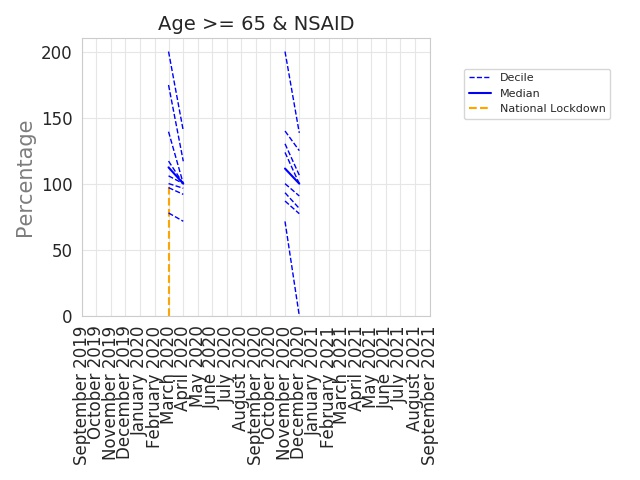

In [7]:
show_image("../output/figures/plot_a.jpeg")

<a id="b"></a>
### H/O peptic ulcer, on oral NSAID without gastroprotection (GI_P3B)

Prescription of an oral NSAID in the previous 3 months to patients with a history of peptic ulceration/gastric bleed.

In [8]:
show_summary('b')

Number of practices with at least one hazardous prescribing event throughout the study period: 39 (90.7%)

Number of unique patients at risk of a hazardous prescribing event throughout the study period: 17,546

Number of unique patients experiencing at least one hazardous prescribing event throughout the study period: 17,411

Number of hazardous prescribing events throughout the study period: 21,204

Q1 2020 mean proportion: 101.7031

Q1 2021 mean proportion: 104.4893

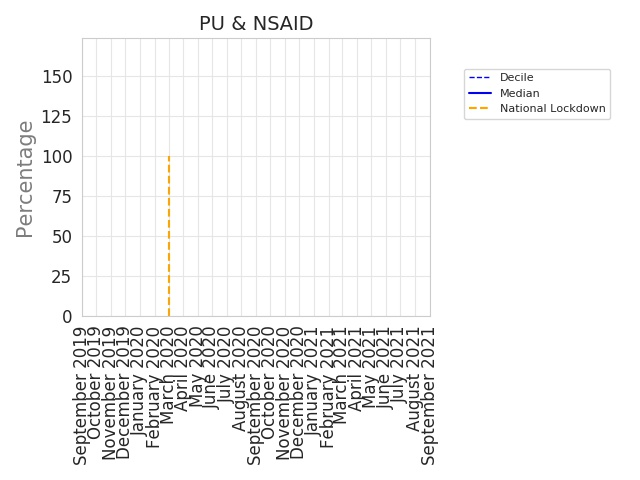

In [9]:
show_image("../output/figures/plot_b.jpeg")



<a id="c"></a>
### H/O peptic ulcer, on OAC without gastroprotection (GI_P3C)

Prescription of an aniplatelet drug in the previous 3 months in patients with a history of peptic ulceration/gatric bleed.

In [10]:
show_summary('c')

Number of practices with at least one hazardous prescribing event throughout the study period: 41 (95.35%)

Number of unique patients at risk of a hazardous prescribing event throughout the study period: 17,474

Number of unique patients experiencing at least one hazardous prescribing event throughout the study period: 17,528

Number of hazardous prescribing events throughout the study period: 21,414

Q1 2020 mean proportion: 92.463

Q1 2021 mean proportion: 100.3405

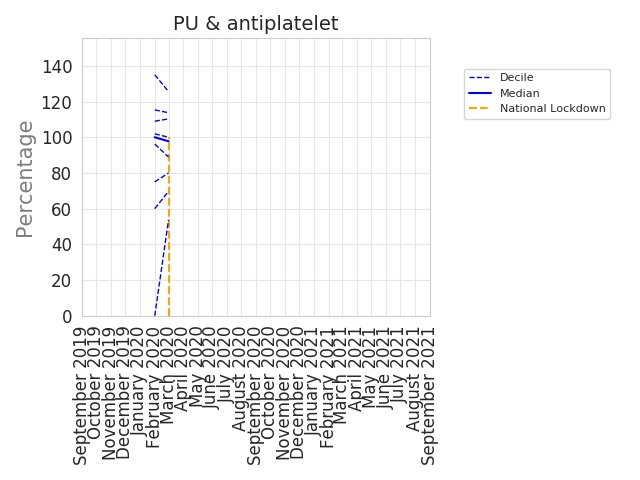

In [11]:
show_image("../output/figures/plot_c.jpeg")

<a id="d"></a>
### On OAC and oral NSAID (GI_P3D)

Prescription of warfarin or a DOAC in the previous 3 months and a preascription of an oral NSAID in the previous 3 months.

In [12]:
show_summary('d')

Number of practices with at least one hazardous prescribing event throughout the study period: 40 (93.02%)

Number of unique patients at risk of a hazardous prescribing event throughout the study period: 17,533

Number of unique patients experiencing at least one hazardous prescribing event throughout the study period: 17,562

Number of hazardous prescribing events throughout the study period: 21,425

Q1 2020 mean proportion: 115.1259

Q1 2021 mean proportion: 107.9789

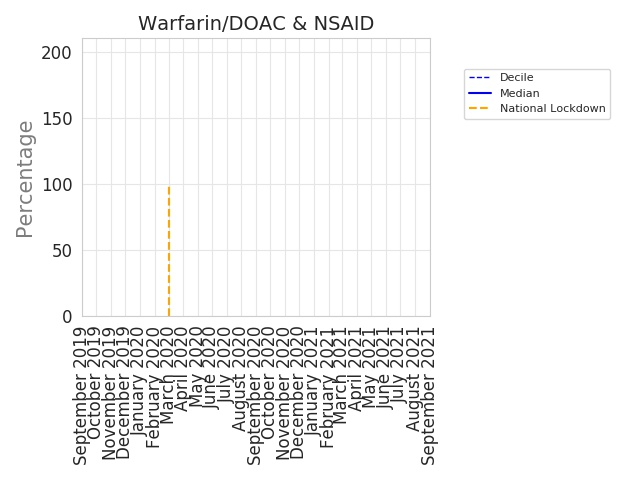

In [13]:
show_image("../output/figures/plot_d.jpeg")

<a id="e"></a>
### On OAC and antiplatelet without gastroprotection (GI_P3E)

Prescription of warfarin or a DOAC in combination with an antiplatelet drug in the previous 3 months without co-prescription of an ulcer-healing drug.

Note: "In combination" is defined as a co-prescription within 28 days of each other.


In [14]:
show_summary('e')

Number of practices with at least one hazardous prescribing event throughout the study period: 34 (79.07%)

Number of unique patients at risk of a hazardous prescribing event throughout the study period: 17,513

Number of unique patients experiencing at least one hazardous prescribing event throughout the study period: 4,715

Number of hazardous prescribing events throughout the study period: 4,938

Q1 2020 mean proportion: 21.8654

Q1 2021 mean proportion: 23.3128

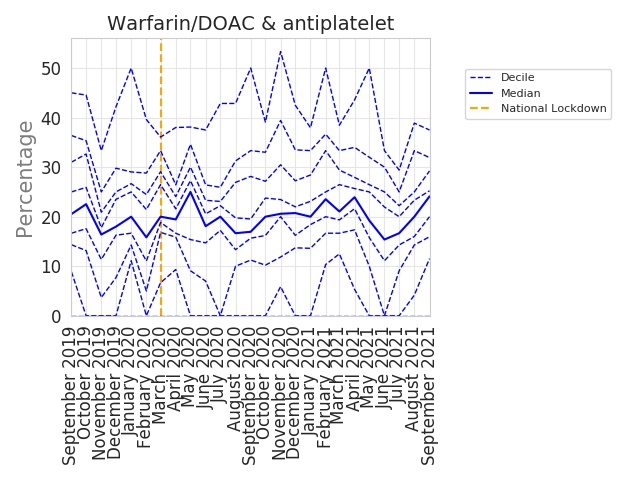

In [15]:
show_image("../output/figures/plot_e.jpeg")

<a id="f"></a>
### On aspirin and antiplatelet without gastroprotection (GI_P3F)

Prescription of aspirin in combination with another antiplatelet drug in the previous 3 months without co-prescription of an ulcer-healing drug.

Note: "In combination" is defined as a co-prescription within 28 days of each other.

In [16]:
show_summary('f')

Number of practices with at least one hazardous prescribing event throughout the study period: 35 (81.4%)

Number of unique patients at risk of a hazardous prescribing event throughout the study period: 17,628

Number of unique patients experiencing at least one hazardous prescribing event throughout the study period: 4,886

Number of hazardous prescribing events throughout the study period: 5,113

Q1 2020 mean proportion: 22.7376

Q1 2021 mean proportion: 27.2876

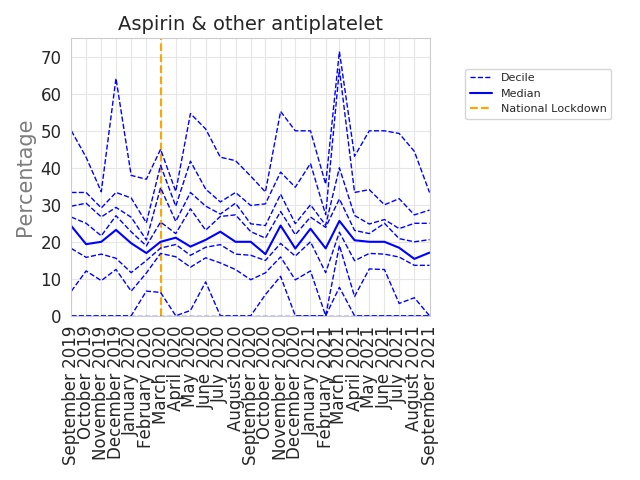

In [17]:
show_image("../output/figures/plot_f.jpeg")

<a id="monitoring"></a>
## Monitoring Indicators

In [18]:
display(
    Markdown(f"Number of practices with at least one hazardous prescribing event throughout the study period: {summary['monitoring']['num_practices']}"),
    Markdown(f"Number of unique patients at risk of a hazardous prescribing event throughout the study period: {summary['monitoring']['patients_denominator']:,}"),
    Markdown(f"Number of unique patients experiencing at least one hazardous prescribing event throughout the study period: {summary['monitoring']['patients_numerator']:,}"),
    Markdown(f"Number of hazardous prescribing events throughout the study period: {num_monitoring_events:,}")
       )

Number of practices with at least one hazardous prescribing event throughout the study period: 43

Number of unique patients at risk of a hazardous prescribing event throughout the study period: 27,867

Number of unique patients experiencing at least one hazardous prescribing event throughout the study period: 28,515

Number of hazardous prescribing events throughout the study period: 107,027

<a id="ac"></a>
### Age 75+, on ACEI or loop, no renal function/electrolytes test (MO_P13)

Absence of a computer-recorded check of renal function or electrolytes in the previous 15 months in patients aged 75 or over who have been prescripted an ACEi of loop diuretic in the previous 6 months.

In [19]:
show_summary('ac')

Number of practices with at least one hazardous prescribing event throughout the study period: 40 (93.02%)

Number of unique patients at risk of a hazardous prescribing event throughout the study period: 17,508

Number of unique patients experiencing at least one hazardous prescribing event throughout the study period: 17,594

Number of hazardous prescribing events throughout the study period: 21,371

Q1 2020 mean proportion: 105.3989

Q1 2021 mean proportion: 102.2924

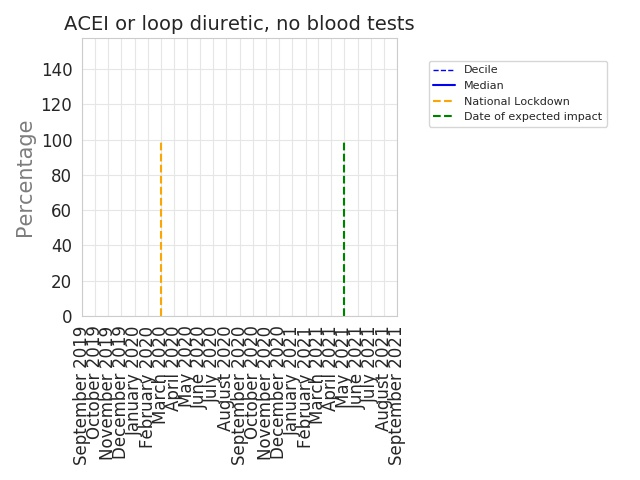

In [20]:
show_image("../output/figures/plot_ac.jpeg")

<a id="me"></a>
### Methotrexate audit (MO_P15)

<a id="me_no_fbc"></a>
#### On methotrexate without recorded full blood count

Absence of a recorded full blood count in the previous 3 months in patients who have been receiving a methotrexate prescription for at least 3 months.

In [21]:
show_summary('me_no_fbc')

Number of practices with at least one hazardous prescribing event throughout the study period: 39 (90.7%)

Number of unique patients at risk of a hazardous prescribing event throughout the study period: 17,493

Number of unique patients experiencing at least one hazardous prescribing event throughout the study period: 17,457

Number of hazardous prescribing events throughout the study period: 21,290

Q1 2020 mean proportion: 105.9687

Q1 2021 mean proportion: 97.7252

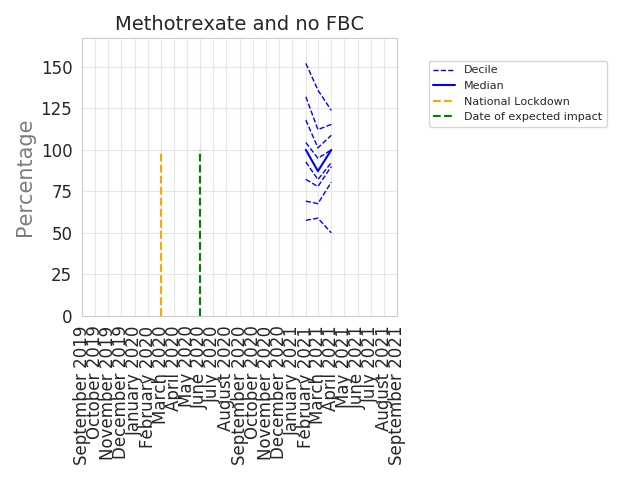

In [22]:
show_image("../output/figures/plot_me_no_fbc.jpeg")

<a id="me_no_lft"></a>
#### On methotrexate without recorded liver function test

Absence of a recorded liver function test in the previous 3 months in patients who have been receiving a methotrexate prescription for at least 3 months.

In [23]:
show_summary('me_no_lft')

Number of practices with at least one hazardous prescribing event throughout the study period: 39 (90.7%)

Number of unique patients at risk of a hazardous prescribing event throughout the study period: 17,493

Number of unique patients experiencing at least one hazardous prescribing event throughout the study period: 17,572

Number of hazardous prescribing events throughout the study period: 21,433

Q1 2020 mean proportion: 99.5994

Q1 2021 mean proportion: 99.9588

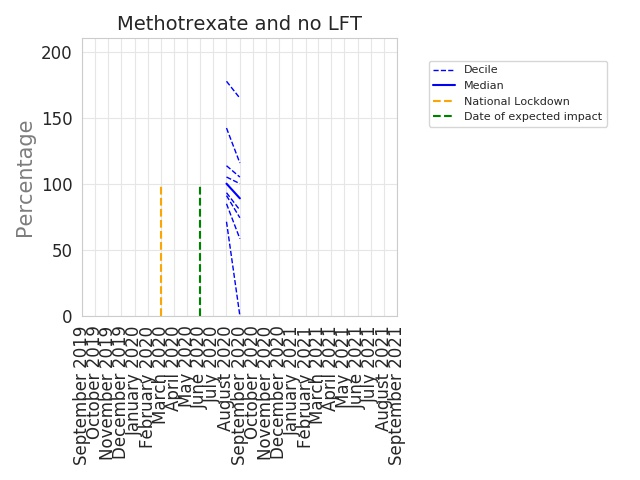

In [24]:
show_image("../output/figures/plot_me_no_lft.jpeg")

<a id="li"></a>
### On lithium without recent lithium test (MO_P17)

Absence of a recorded check of lithium concentration in the previous 3 months in patients who have been receiving a lithium prescription for at least 3 months.

In [25]:
show_summary('li')

Number of practices with at least one hazardous prescribing event throughout the study period: 39 (90.7%)

Number of unique patients at risk of a hazardous prescribing event throughout the study period: 17,544

Number of unique patients experiencing at least one hazardous prescribing event throughout the study period: 17,640

Number of hazardous prescribing events throughout the study period: 21,593

Q1 2020 mean proportion: 100.4119

Q1 2021 mean proportion: 108.7928

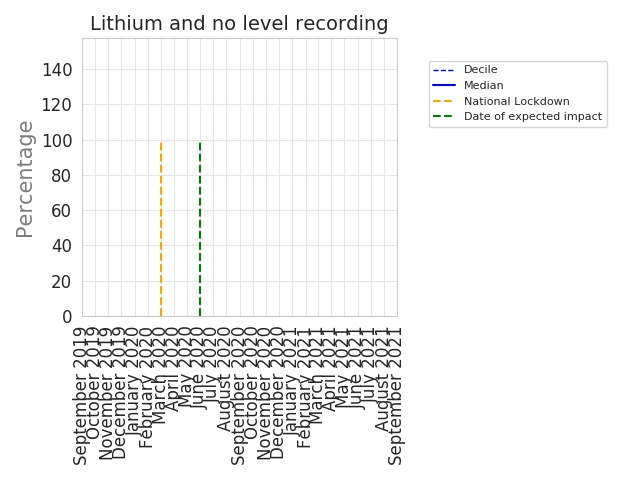

In [26]:
show_image("../output/figures/plot_li.jpeg")

<a id="am"></a>
### On amiodarone without recent thyroid function test (MO_P18)

Absence of a recorded thyroid function test in the previous 6 months in patients who have been receiving a lithium prescription for at least 6 months.

In [27]:
show_summary('am')

Number of practices with at least one hazardous prescribing event throughout the study period: 39 (90.7%)

Number of unique patients at risk of a hazardous prescribing event throughout the study period: 17,415

Number of unique patients experiencing at least one hazardous prescribing event throughout the study period: 17,531

Number of hazardous prescribing events throughout the study period: 21,340

Q1 2020 mean proportion: 98.301

Q1 2021 mean proportion: 97.8142

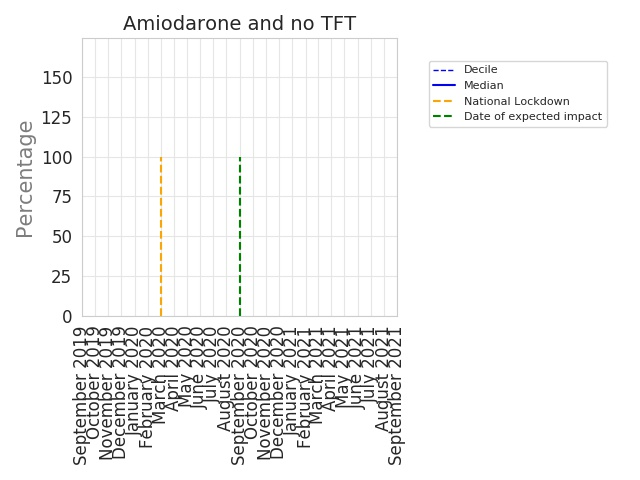

In [28]:
show_image("../output/figures/plot_am.jpeg")

<a id="other"></a>
## Other Indicators


In [29]:
display(
    Markdown(f"Number of practices with at least one hazardous prescribing event throughout the study period: {summary['other']['num_practices']}"),
    Markdown(f"Number of unique patients at risk of a hazardous prescribing event throughout the study period: {summary['other']['patients_denominator']:,}"),
    Markdown(f"Number of unique patients experiencing at least one hazardous prescribing event throughout the study period: {summary['other']['patients_numerator']:,}"),
    Markdown(f"Number of hazardous prescribing events throughout the study period: {num_other_events:,}")
       )

Number of practices with at least one hazardous prescribing event throughout the study period: 40

Number of unique patients at risk of a hazardous prescribing event throughout the study period: 23,938

Number of unique patients experiencing at least one hazardous prescribing event throughout the study period: 23,993

Number of hazardous prescribing events throughout the study period: 42,664

<a id="g"></a>
### Asthma and non-selective BB (AS_P3G)

Prescription of a non-selective beta-blocker in the previous 3 months in patients with a history of asthma.

Note: History of asthma is defined as patients with a recorded code for asthma without a more recent asthma resolved code.

In [30]:
show_summary('g')

Number of practices with at least one hazardous prescribing event throughout the study period: 40 (93.02%)

Number of unique patients at risk of a hazardous prescribing event throughout the study period: 17,620

Number of unique patients experiencing at least one hazardous prescribing event throughout the study period: 17,557

Number of hazardous prescribing events throughout the study period: 21,334

Q1 2020 mean proportion: 95.9376

Q1 2021 mean proportion: 111.0771

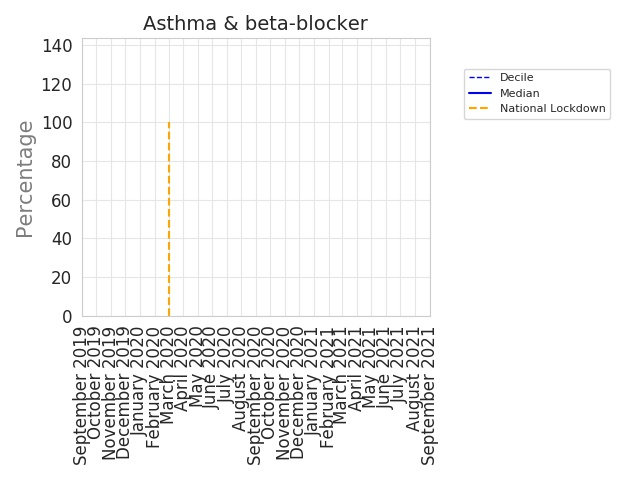

In [31]:
show_image("../output/figures/plot_g.jpeg")

<a id="i"></a>
### Heart failure and oral NSAID (HF_P3I)

Prescription of an oral NSAID in the previous 3 months in patients with heart failure.

In [32]:
show_summary('i')

Number of practices with at least one hazardous prescribing event throughout the study period: 39 (90.7%)

Number of unique patients at risk of a hazardous prescribing event throughout the study period: 17,525

Number of unique patients experiencing at least one hazardous prescribing event throughout the study period: 17,527

Number of hazardous prescribing events throughout the study period: 21,330

Q1 2020 mean proportion: 98.8679

Q1 2021 mean proportion: 101.9943

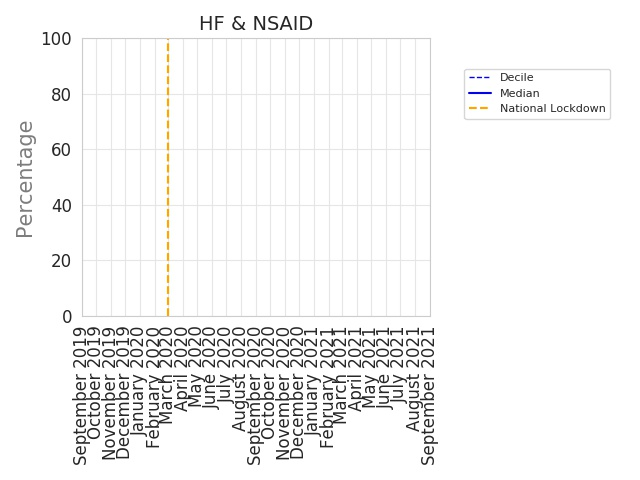

In [33]:
show_image("../output/figures/plot_i.jpeg")